In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\Ames_Housing_Sales.csv')
test_df = pd.read_csv(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\Ames_Housing_Sales.csv')


# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Step 1: Load the CSV file into a DataFrame
# df = pd.read_csv('data.csv')

# # Step 2: Optionally, define your features (X) and target (y)
# # If you have a target column, separate it from the features
# # For example, if your target is in a column named 'target':
# X = df.drop(columns=['target'])  # Features
# y = df['target']  # Target

# # Step 3: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 4: Combine X_train and y_train into df_train, and X_test and y_test into df_test
# df_train = pd.concat([X_train, y_train], axis=1)
# df_test = pd.concat([X_test, y_test], axis=1)




# Display basic info
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   int64  
 1   2ndFlrSF       1379 non-null   int64  
 2   3SsnPorch      1379 non-null   int64  
 3   Alley          82 non-null     object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       953 non-null    object 
 7   BsmtExposure   953 non-null    object 
 8   BsmtFinSF1     1379 non-null   int64  
 9   BsmtFinSF2     1379 non-null   int64  
 10  BsmtFinType1   953 non-null    object 
 11  BsmtFinType2   952 non-null    object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       953 non-null    object 
 15  BsmtUnfSF      1379 non-null   int64  
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [7]:
# Define features and target
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)


In [9]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_processed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

C:\Users\RISHYENDRA KUMAR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 40808771584.0000 - mean_squared_error: 40808771584.0000 - val_loss: 41398280192.0000 - val_mean_squared_error: 41398280192.0000
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42153652224.0000 - mean_squared_error: 42153652224.0000 - val_loss: 41122033664.0000 - val_mean_squared_error: 41122033664.0000
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39598673920.0000 - mean_squared_error: 39598673920.0000 - val_loss: 39342055424.0000 - val_mean_squared_error: 39342055424.0000
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37885599744.0000 - mean_squared_error: 37885599744.0000 - val_loss: 33291075584.0000 - val_mean_squared_error: 33291075584.0000
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29428328448.0000 - mean_squared_error: 29428328448.0000 - val_loss: 20666320896.0000 - val_mean_squared_error: 20666320896.0000
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18643

In [13]:
# Evaluate the model
val_loss, val_mse = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Mean Squared Erro: {val_mse}")r

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 668753984.0000 - mean_squared_error: 668753984.0000 
Validation Loss: 1046927040.0
Validation Mean Squared Error: 1046927040.0


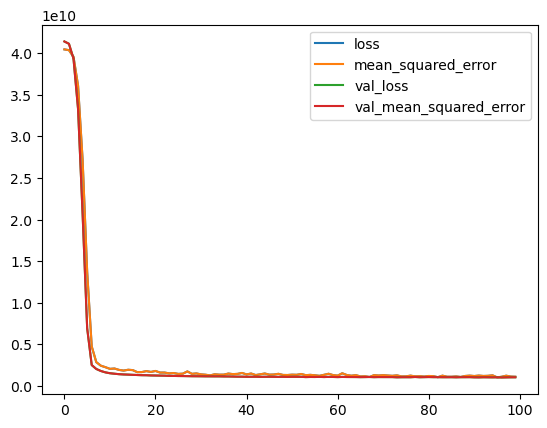

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

metrics_df=pd.DataFrame(history.history)
metrics_df.plot()
plt.show()